Падгружаем дадзеныя

In [1]:
!ls ../input/Kannada-MNIST


Dig-MNIST.csv  sample_submission.csv  test.csv	train.csv


In [2]:
# %tensorflow_version 1.x
import tensorflow
print(tensorflow.__version__)
import tensorflow.keras as keras
print(keras.__version__)

2.0.0
2.2.4-tf


Дастаем дадзеныя для трэйна і валідацыі

In [3]:
import pandas as pd
train_set = pd.read_csv("../input/Kannada-MNIST/train.csv")
print(type(train_set))
train_array = train_set.values
y_train, x_train = train_array[:, :1], train_array[:, 1:]
# print(y_train, y_train.shape,"\n", x_train, x_train.shape)
print(x_train.dtype, x_train.min(), x_train.max())


<class 'pandas.core.frame.DataFrame'>
int64 0 255


Дастаем дадзеныя для тэста


In [4]:
test_set = pd.read_csv("../input/Kannada-MNIST/test.csv")
print(type(test_set))
test_array = test_set.values

y_test, x_test = test_array[:, :1], test_array[:, 1:]

<class 'pandas.core.frame.DataFrame'>


In [5]:
print(x_test)
print(x_test.max(), x_test.min())
print(y_test)
print(y_train)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
255 0
[[   0]
 [   1]
 [   2]
 ...
 [4997]
 [4998]
 [4999]]
[[0]
 [1]
 [2]
 ...
 [7]
 [8]
 [9]]


Намалюем некалькі аб'ектаў

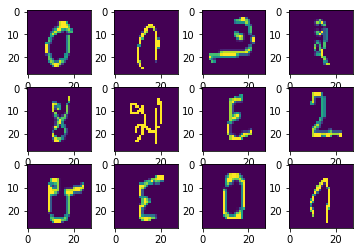

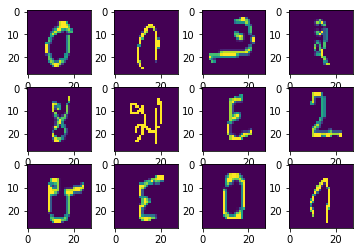

In [6]:
from skimage.io import imshow, imshow_collection

imshow_collection(x_train[:12].reshape(12, 28, 28))


Нармалізуем дадзеныя


In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler((-1, 1), False)
print(scaler.fit(x_train))
# print(scaler.data_max_)
x_train = scaler.transform(x_train)
# print(scaler.data_max_)
# print(x_train)
print(x_train.min(), x_train.max())


MinMaxScaler(copy=False, feature_range=(-1, 1))
-1.0 1.0


Нармалізацыя для тэставых, але тут нейкая лухта


In [8]:
print(x_test.min(), x_test.max())
scaler = MinMaxScaler((-1, 1), False)
scaler.fit(x_test)
x_test = scaler.transform(x_test)
print(x_test.min(), x_test.max())

0 255
-1.0 1.0


Б'ем дадзеныя на трэйн і валідэйшн

In [9]:
x_train, x_valid, y_train, y_valid = x_train[:50000], x_train[50000:], y_train[:50000], y_train[50000:]

Вызначаем параметры мадэлі

In [10]:
from keras.layers import *
from keras.models import Model, Sequential
from keras.callbacks import CSVLogger, ModelCheckpoint

x = Input(shape=(784,))
y = Dense(20, activation=None)(x)
y = Activation('elu')(y)
y = Dropout(rate=0.3)(y)
y = Dense(20, activation=None)(y)
y = Activation('elu')(y)
prediction = Dense(10, activation='softmax')(y)

model = Model(inputs=[x], output=[prediction])

model.compile(optimizer ='sgd',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Using TensorFlow backend.


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 20)                15700     
_________________________________________________________________
activation_1 (Activation)    (None, 20)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 20)                420       
_________________________________________________________________
activation_2 (Activation)    (None, 20)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                210 

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=[<tf.Tenso...)`
  del sys.path[0]


In [11]:
model.fit(
    # x_train - 0.5, y_train,
          x_train, y_train,
          batch_size=16,
          epochs=20,
          verbose=1,
          # validation_data=(x_valid - 0.5, y_valid),
          validation_data=(x_valid, y_valid),
          callbacks=[
              CSVLogger('log.csv'),
              ModelCheckpoint('model.h5', save_best_only=True),
          ])

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 8s 161us/step - loss: 0.4883 - accuracy: 0.8512 - val_loss: 0.1235 - val_accuracy: 0.9635
Epoch 2/20
50000/50000 [==============================] - 8s 155us/step - loss: 0.2525 - accuracy: 0.9231 - val_loss: 0.0990 - val_accuracy: 0.9712
Epoch 3/20
50000/50000 [==============================] - 8s 153us/step - loss: 0.2227 - accuracy: 0.9311 - val_loss: 0.0815 - val_accuracy: 0.9751
Epoch 4/20
50000/50000 [==============================] - 8s 152us/step - loss: 0.2019 - accuracy: 0.9383 - val_loss: 0.0792 - val_accuracy: 0.9752
Epoch 5/20
50000/50000 [==============================] - 8s 152us/step - loss: 0.1940 - accuracy: 0.9400 - val_loss: 0.0832 - val_accuracy: 0.9757
Epoch 6/20
50000/50000 [==============================] - 8s 153us/step - loss: 0.1819 - accuracy: 0.9433 - val_loss: 0.0698 - val_accuracy: 0.9799
Epoch 7/20
50000/50000 [==============================] - 8s 1

In [12]:
!ls


__notebook__.ipynb  __output__.json  log.csv  model.h5


In [13]:
print(x_test)

[[-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]
 ...
 [-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]]


In [14]:
# model = keras.models.load_model('model.h5')

# pred_probas = model.predict(x_test - 0.5, batch_size=16)
pred_probas = model.predict(x_test, batch_size=16)

prediction = pred_probas.argmax(axis=1)

# predictions = model.predict(x_test)
# print(predictions)

In [15]:
submission = pd.read_csv('../input/Kannada-MNIST/sample_submission.csv')

In [16]:
submission['label'] = prediction

In [17]:
submission.head()

,id,label
0,0,3
1,1,0
2,2,2
3,3,6
4,4,7


In [18]:
submission.to_csv("submission.csv",index=False)

In [19]:
!ls

__notebook__.ipynb  __output__.json  log.csv  model.h5	submission.csv
